# Seismic Anomaly Detection

Mining activity was and is always connected with the occurrence of dangers which are commonly called 
mining hazards. A special case of such threat is a seismic hazard which frequently occurs in many 
underground mines. Seismic hazard is the hardest detectable and predictable of natural hazards and in 
this respect it is comparable to an earthquake. More and more advanced seismic and seismoacoustic 
monitoring systems allow a better understanding rock mass processes and definition of seismic hazard 
prediction methods.

**Attribute info:**
- `seismic`: result of shift seismic hazard assessment in the mine working obtained by the seismic method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state)
- `seismoacoustic`: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method
- `shift`: information about type of a shift (W - coal-getting, N -preparation shift)
- `genergy`: seismic energy recorded within previous shift by the most active geophone (GMax) out of geophones monitoring the longwall
- `gpuls`: a number of pulses recorded within previous shift by GMax
- `gdenergy`: a deviation of energy recorded within previous shift by GMax from average energy recorded during eight previous shifts
- `gdpuls`: a deviation of a number of pulses recorded within previous shift by GMax from average number of pulses recorded during eight previous shifts
- `ghazard`: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming form GMax only
- `nbumps`: the number of seismic bumps recorded within previous shift
- `nbumps2`: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift

- `nbumps3`: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift

- `nbumps4`: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift

- `nbumps5`: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift

- `nbumps6`: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift

- `nbumps7`: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift

- `nbumps89`: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift

- `energy`: total energy of seismic bumps registered within previous shift
- `maxenergy`: the maximum energy of the seismic bumps registered within previous shift
- `class`: the decision attribute - '1' means that high energy seismic bump occurred in the next shift ('hazardous state'), '0' means that no high energy seismic bumps occurred in the next shift ('non-hazardous state')

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

from scipy.io import arff
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import recall_score, precision_score, confusion_matrix

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.simplefilter('ignore')

/Users/benjamincashman/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/benjamincashman/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/benjamincashman/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/benjamincashman/.local/lib/python3.6/site-packages/ten

## Loading data

In [2]:
data = arff.loadarff("seismic-bumps.arff")
data = pd.DataFrame(data[0])

In [3]:
data.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [4]:
data.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

In [5]:
def byte_to_string(byte):
    return byte.decode('utf-8')

In [6]:
data["seismic"] = data["seismic"].apply(byte_to_string)
data["seismoacoustic"] = data["seismoacoustic"].apply(byte_to_string)
data["shift"] = data["shift"].apply(byte_to_string)
data["ghazard"] = data["ghazard"].apply(byte_to_string)
data["class"] = data["class"].apply(byte_to_string).apply(int)

In [7]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
seismic,2584,2,a,1682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seismoacoustic,2584,3,a,1580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shift,2584,2,W,1663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genergy,2584,NaN,NaN,NaN,90242.5,229201,100,11660,25485,52832.5,2.59565e+06
gpuls,2584,NaN,NaN,NaN,538.579,562.653,2,190,379,669,4518
gdenergy,2584,NaN,NaN,NaN,12.3758,80.3191,-96,-37,-6,38,1245
gdpuls,2584,NaN,NaN,NaN,4.5089,63.1666,-96,-36,-6,30.25,838
ghazard,2584,3,a,2342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nbumps,2584,NaN,NaN,NaN,0.85952,1.36462,0,0,0,1,9
nbumps2,2584,NaN,NaN,NaN,0.393576,0.783772,0,0,0,1,8


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
seismic           2584 non-null object
seismoacoustic    2584 non-null object
shift             2584 non-null object
genergy           2584 non-null float64
gpuls             2584 non-null float64
gdenergy          2584 non-null float64
gdpuls            2584 non-null float64
ghazard           2584 non-null object
nbumps            2584 non-null float64
nbumps2           2584 non-null float64
nbumps3           2584 non-null float64
nbumps4           2584 non-null float64
nbumps5           2584 non-null float64
nbumps6           2584 non-null float64
nbumps7           2584 non-null float64
nbumps89          2584 non-null float64
energy            2584 non-null float64
maxenergy         2584 non-null float64
class             2584 non-null int64
dtypes: float64(14), int64(1), object(4)
memory usage: 383.7+ KB


In [9]:
data["seismic"] = data["seismic"].map({'a': 0, 'b': 1})

In [10]:
data["seismoacoustic"] = data["seismoacoustic"].map({'a': 0, 'b': 1, 'c': 2})

In [11]:
data["shift"] = data["shift"].map({"N": 0, "W": 1})

In [12]:
data["ghazard"] = data["ghazard"].map({'a': 0, 'b': 1, 'c': 2})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
seismic           2584 non-null int64
seismoacoustic    2584 non-null int64
shift             2584 non-null int64
genergy           2584 non-null float64
gpuls             2584 non-null float64
gdenergy          2584 non-null float64
gdpuls            2584 non-null float64
ghazard           2584 non-null int64
nbumps            2584 non-null float64
nbumps2           2584 non-null float64
nbumps3           2584 non-null float64
nbumps4           2584 non-null float64
nbumps5           2584 non-null float64
nbumps6           2584 non-null float64
nbumps7           2584 non-null float64
nbumps89          2584 non-null float64
energy            2584 non-null float64
maxenergy         2584 non-null float64
class             2584 non-null int64
dtypes: float64(14), int64(5)
memory usage: 383.7 KB


## Exploratory Data Analysis

In [14]:
#sns.pairplot(data);

In [15]:
cont_cols = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']

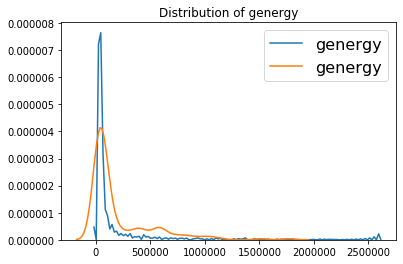

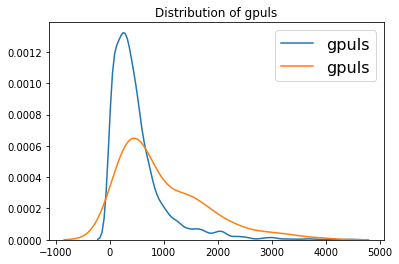

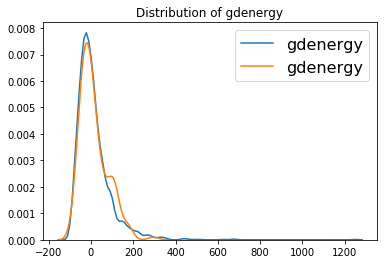

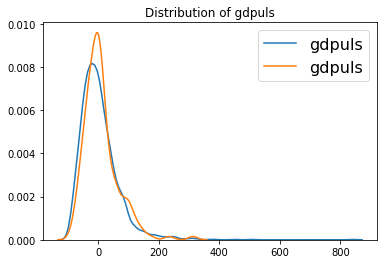

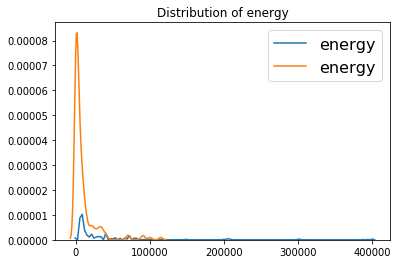

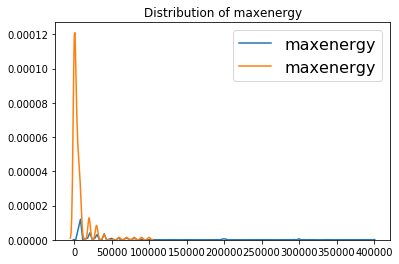

In [16]:
for col in cont_cols:
    fig = plt.figure()
    fig.add_subplot()
    sns.kdeplot(data.loc[data['class'] == 0, col])
    sns.kdeplot(data.loc[data['class'] == 1, col])
    plt.title("Distribution of " + col)

We can drop these variables because they do not give us any information about classifying seismic activity

In [17]:
data.drop(["nbumps6", "nbumps7", "nbumps89"], axis=1, inplace=True)

In [18]:
data.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,0,0,0,15180.0,48.0,-72.0,-72.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,14720.0,33.0,-70.0,-79.0,0,1.0,0.0,1.0,0.0,0.0,2000.0,2000.0,0
2,0,0,0,8050.0,30.0,-81.0,-78.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,28820.0,171.0,-23.0,40.0,0,1.0,0.0,1.0,0.0,0.0,3000.0,3000.0,0
4,0,0,0,12640.0,57.0,-63.0,-52.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


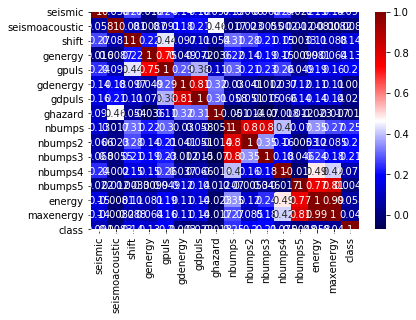

In [19]:
sns.heatmap(data.corr(), annot=True, cmap="seismic");

## Apply power transformation to make features more Gaussian 

In [20]:
# function to add small epsilon value so we can apply log
def treat_zero(x):
    if x == 0:
        return 10e-8
    return x

In [21]:
pt = PowerTransformer(method="yeo-johnson")

for col in cont_cols:
    pt_col = pt.fit_transform(data[[col]])
    data["pt_" + col] = pt_col

In [22]:
pt_cols = ['pt_genergy', 'pt_gpuls', 'pt_gdenergy', 'pt_gdpuls', 'pt_energy', 'pt_maxenergy']

In [23]:
data.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,...,nbumps5,energy,maxenergy,class,pt_genergy,pt_gpuls,pt_gdenergy,pt_gdpuls,pt_energy,pt_maxenergy
0,0,0,0,15180.0,48.0,-72.0,-72.0,0,0.0,0.0,...,0.0,0.0,0.0,0,-0.381116,-1.520214,-1.709059,-1.742233,-0.864503,-0.864770
1,0,0,0,14720.0,33.0,-70.0,-79.0,0,1.0,0.0,...,0.0,2000.0,2000.0,0,-0.404789,-1.727737,-1.648217,-1.956975,1.089282,1.117201
2,0,0,0,8050.0,30.0,-81.0,-78.0,0,0.0,0.0,...,0.0,0.0,0.0,0,-0.882605,-1.777504,-1.985922,-1.926151,-0.864503,-0.864770
3,0,0,0,28820.0,171.0,-23.0,40.0,0,1.0,0.0,...,0.0,3000.0,3000.0,0,0.097454,-0.659500,-0.313980,0.736074,1.149455,1.177447
4,0,0,0,12640.0,57.0,-63.0,-52.0,0,0.0,0.0,...,0.0,0.0,0.0,0,-0.522958,-1.418466,-1.437369,-1.143429,-0.864503,-0.864770


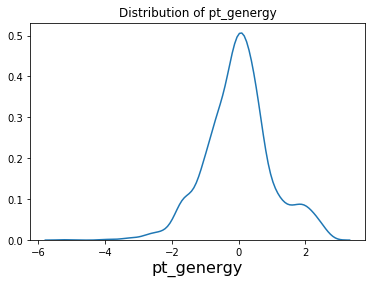

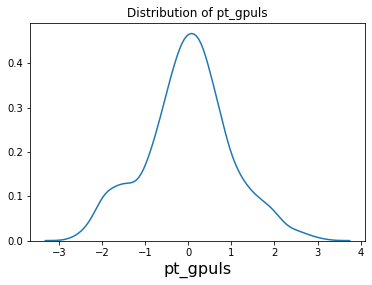

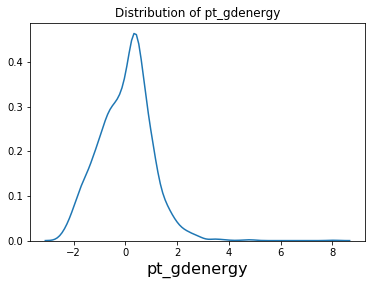

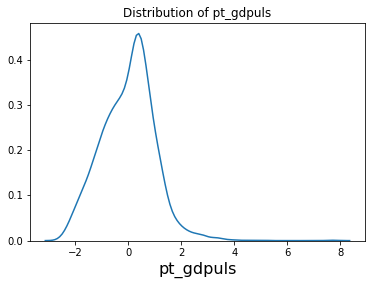

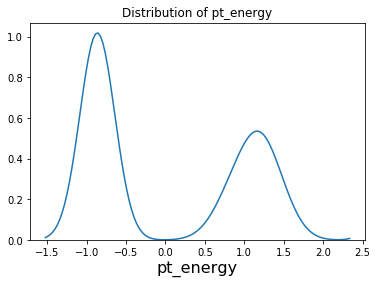

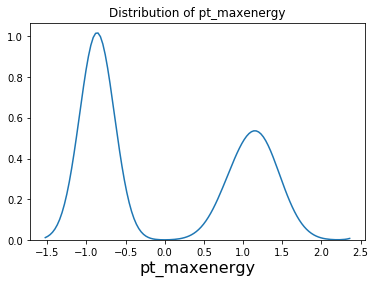

In [24]:
for col in pt_cols:
    fig = plt.figure()
    fig.add_subplot()
    sns.distplot(data[col], hist=False)
#     sns.kdeplot(data.loc[data['class'] == 0, col])
#     sns.kdeplot(data.loc[data['class'] == 1, col])
    plt.title("Distribution of " + col)
#     plt.legend([0, 1])

In [25]:
data.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,...,nbumps5,energy,maxenergy,class,pt_genergy,pt_gpuls,pt_gdenergy,pt_gdpuls,pt_energy,pt_maxenergy
0,0,0,0,15180.0,48.0,-72.0,-72.0,0,0.0,0.0,...,0.0,0.0,0.0,0,-0.381116,-1.520214,-1.709059,-1.742233,-0.864503,-0.864770
1,0,0,0,14720.0,33.0,-70.0,-79.0,0,1.0,0.0,...,0.0,2000.0,2000.0,0,-0.404789,-1.727737,-1.648217,-1.956975,1.089282,1.117201
2,0,0,0,8050.0,30.0,-81.0,-78.0,0,0.0,0.0,...,0.0,0.0,0.0,0,-0.882605,-1.777504,-1.985922,-1.926151,-0.864503,-0.864770
3,0,0,0,28820.0,171.0,-23.0,40.0,0,1.0,0.0,...,0.0,3000.0,3000.0,0,0.097454,-0.659500,-0.313980,0.736074,1.149455,1.177447
4,0,0,0,12640.0,57.0,-63.0,-52.0,0,0.0,0.0,...,0.0,0.0,0.0,0,-0.522958,-1.418466,-1.437369,-1.143429,-0.864503,-0.864770


In [26]:
data.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'energy', 'maxenergy', 'class', 'pt_genergy', 'pt_gpuls',
       'pt_gdenergy', 'pt_gdpuls', 'pt_energy', 'pt_maxenergy'],
      dtype='object')

In [27]:
new_data = data[["seismic", "seismoacoustic", "shift", "pt_genergy", "pt_gpuls", "pt_gdenergy", 
                 "pt_gdpuls", "ghazard", "nbumps", "nbumps2", "nbumps3", "nbumps4", 
                 'nbumps5', 'pt_energy', 'pt_maxenergy', 'class']]

In [28]:
new_data.groupby('class').count()

,seismic,seismoacoustic,shift,pt_genergy,pt_gpuls,pt_gdenergy,pt_gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,pt_energy,pt_maxenergy
class,,,,,,,,,,,,,,,
0,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414
1,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170


In [29]:
# corr_cols = ["genergy", "gpuls", "gdenergy", "gdpuls", "ghazard", "energy", "maxenergy", "class"]
# cols = pt_cols + ['class']
'''
g = sns.PairGrid(new_data, hue = "class")
g = g.map_upper(sns.scatterplot, alpha=0.6)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
g = g.add_legend()
'''

'\ng = sns.PairGrid(new_data, hue = "class")\ng = g.map_upper(sns.scatterplot, alpha=0.6)\ng = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)\ng = g.map_diag(plt.hist)\ng = g.add_legend()\n'

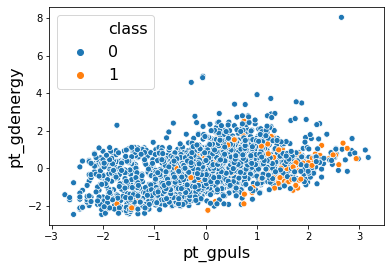

In [30]:
sns.scatterplot(data=new_data, x='pt_gpuls', y="pt_gdenergy", hue="class");

## Anomaly Detection

In [31]:
X = new_data.drop('class', axis=1)
y = new_data['class']

### Local outlier factor

In [32]:
lof = LocalOutlierFactor(n_neighbors=10,
                         algorithm='brute', 
                         metric='mahalanobis', 
                         metric_params ={'V':10},
                         contamination=0.0655);

outliers = lof.fit_predict(X);
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 170, 2414]))

<IPython.core.display.Javascript object>


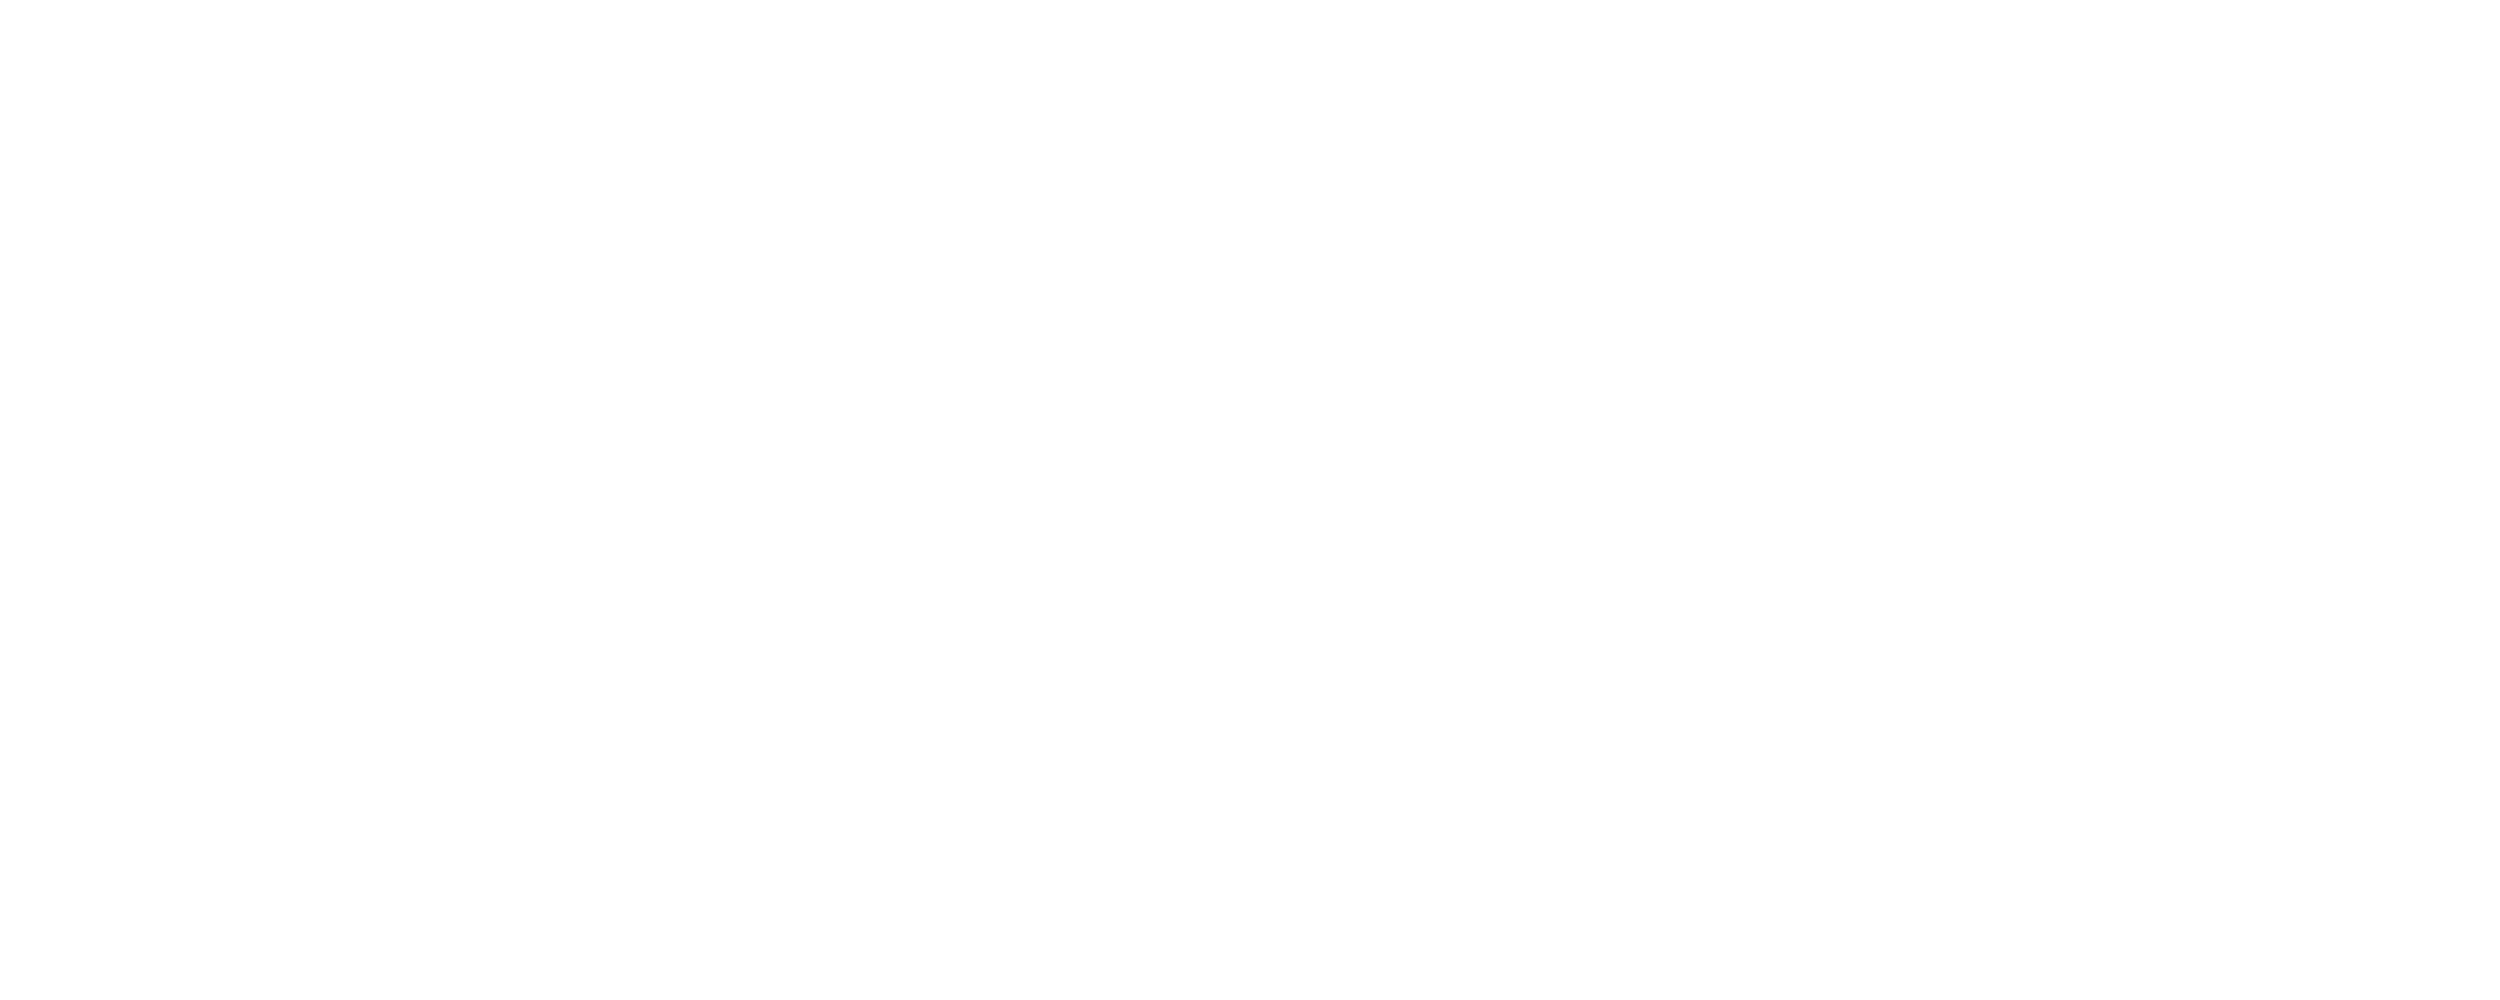

In [33]:
%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=new_data["pt_gdpuls"], ys=new_data["pt_gdenergy"], zs=data["pt_genergy"], c=(outliers+2)*0.5)

In [34]:
outlier_map = pd.DataFrame(outliers)[0].map({1: 0, -1:1})

In [35]:
(outlier_map == data['class']).mean()

0.8738390092879257

In [36]:
recall_score(y, outlier_map)

0.041176470588235294

In [37]:
precision_score(y, outlier_map)

0.041176470588235294

### DB Scan

In [38]:
dbs = DBSCAN(eps = 0.22, 
             metric="euclidean", 
             min_samples=8, 
             n_jobs=-1)

clusters = dbs.fit_predict(X)
np.unique(clusters, return_counts=True)

(array([-1,  0]), array([2572,   12]))

<IPython.core.display.Javascript object>


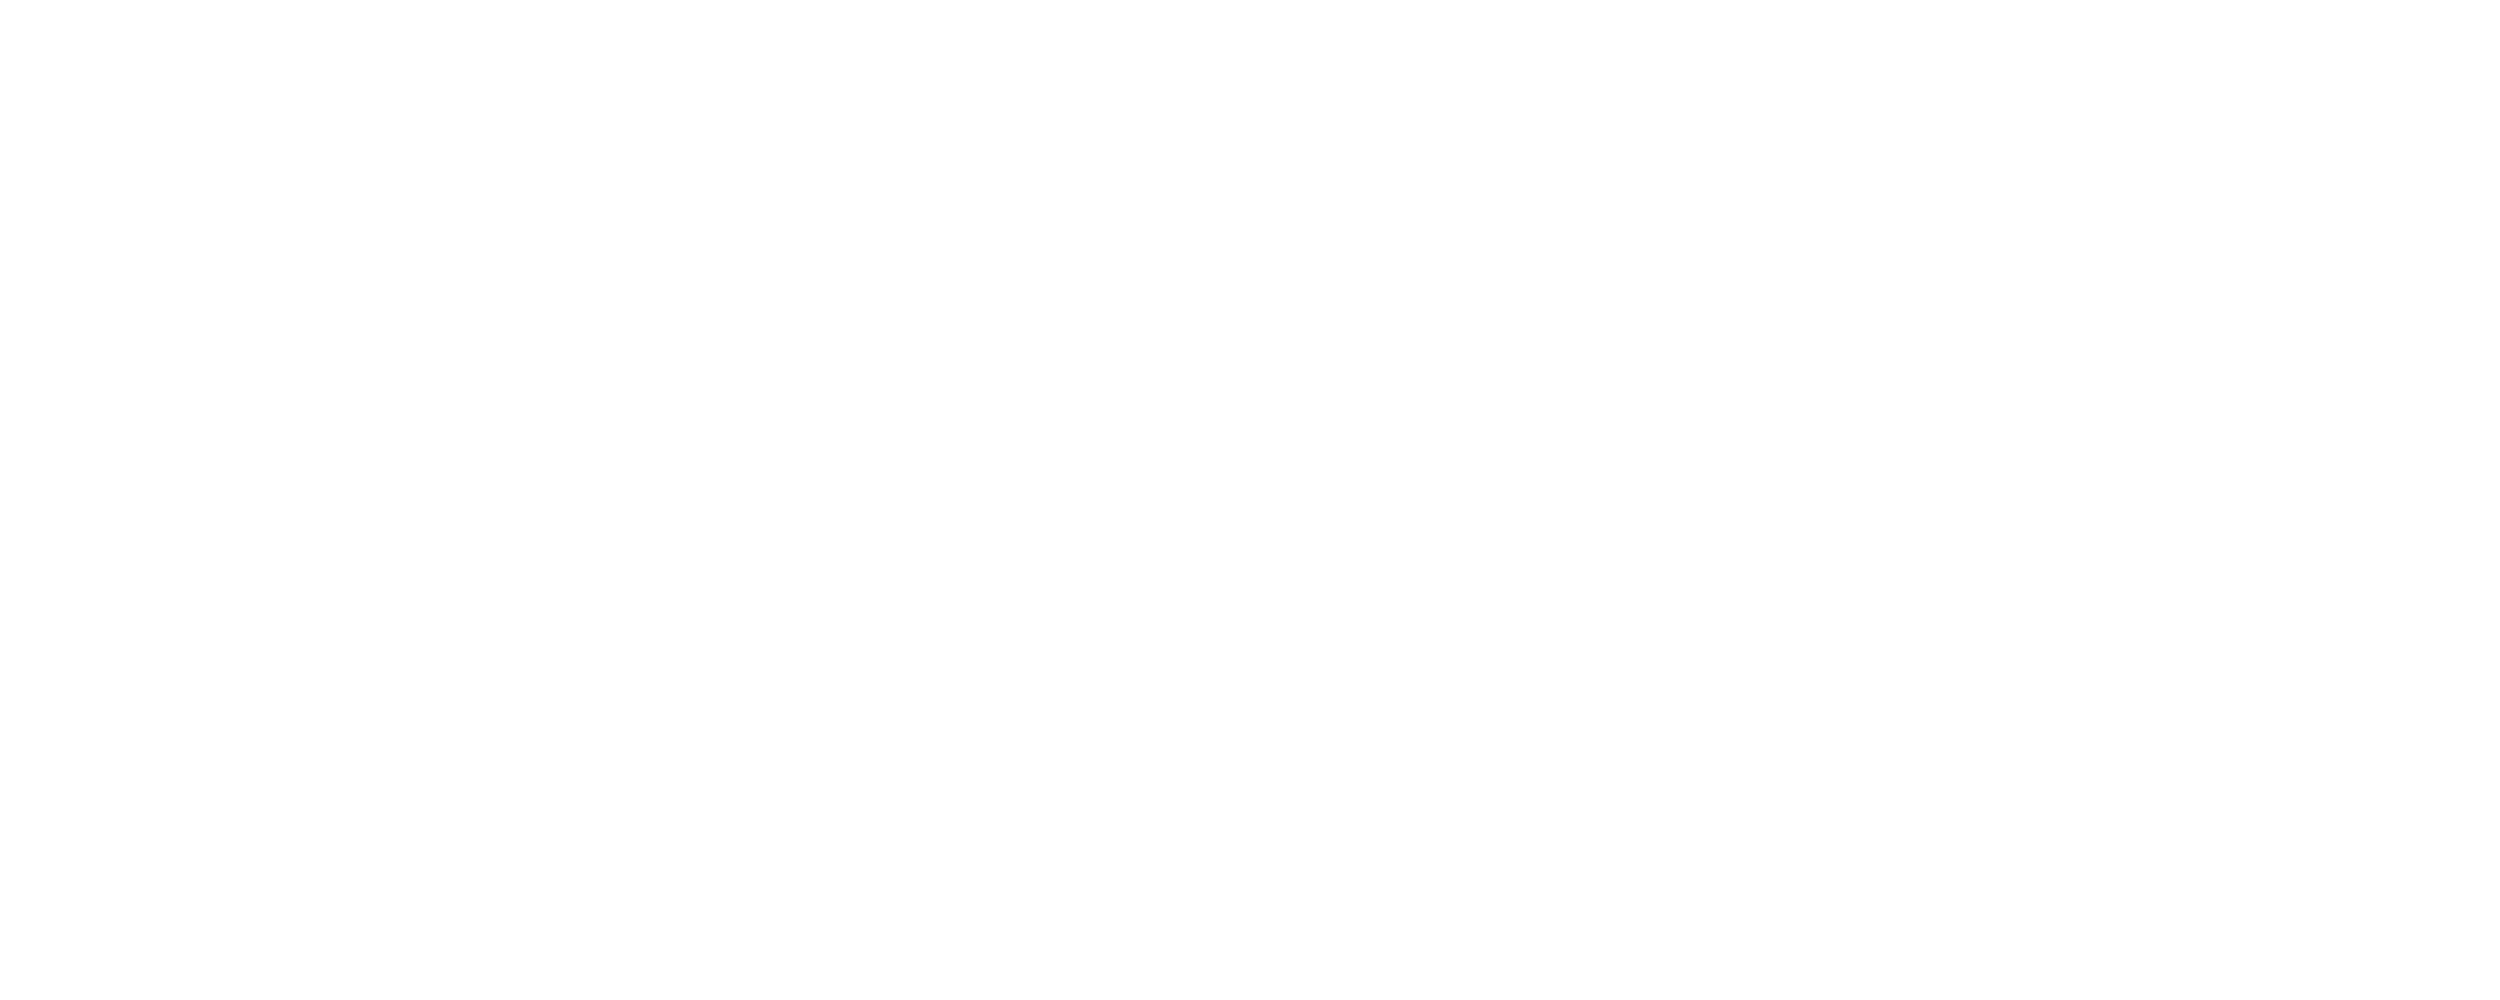

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=new_data["pt_gdpuls"], ys=new_data["pt_gdenergy"], zs=data["pt_genergy"])

### Isolation forest

In [40]:
isof = IsolationForest(n_estimators=200, 
                       max_samples=15, 
                       contamination=0.0655, 
                       max_features=1.0, 
                       bootstrap=False, 
                       behaviour="old", 
                       random_state=None,  
                       warm_start=False)

clusters = isof.fit_predict(X)

In [41]:
np.unique(clusters, return_counts=True)

(array([-1,  1]), array([ 170, 2414]))

In [42]:
clusters_map = pd.DataFrame(clusters)[0].map({1: 0, -1:1})

In [43]:
(clusters_map == data['class']).mean()

0.8993808049535603

In [44]:
recall_score(y, clusters_map)

0.23529411764705882

In [45]:
precision_score(y, clusters_map)

0.23529411764705882

In [46]:
# isolation forest
# kpca
# tsne

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [48]:

X = data.drop('class', axis = 1)
y = data['class']

In [49]:
print(X.shape, y.shape)

(2584, 21) (2584,)


In [50]:
X.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'energy', 'maxenergy', 'pt_genergy', 'pt_gpuls',
       'pt_gdenergy', 'pt_gdpuls', 'pt_energy', 'pt_maxenergy'],
      dtype='object')

In [51]:
feat_cols = ['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'energy', 'maxenergy']

In [52]:
df = pd.DataFrame(X,columns=feat_cols)

In [53]:
df['y'] = y

In [54]:
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (2584, 16)


In [55]:
np.random.seed(42)

In [56]:
rndperm = np.random.permutation(df.shape[0])

In [57]:
import time

In [58]:
time_start = time.time()

In [59]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [60]:
data_subset = df[feat_cols].values


In [61]:
tsne_results = tsne.fit_transform(data_subset)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2584 samples in 0.005s...
[t-SNE] Computed neighbors for 2584 samples in 0.095s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2584
[t-SNE] Computed conditional probabilities for sample 2000 / 2584
[t-SNE] Computed conditional probabilities for sample 2584 / 2584
[t-SNE] Mean sigma: 69.827176
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.599804
[t-SNE] KL divergence after 300 iterations: 0.707668


In [62]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

In [63]:
df['y'].unique()

array([0, 1])

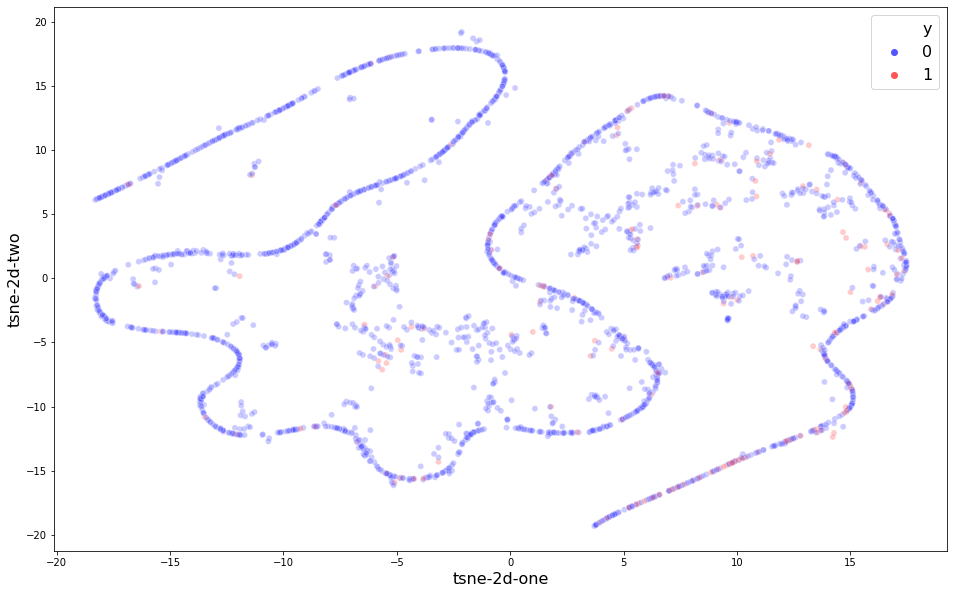

In [64]:
plt.figure(figsize=(16,10));
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df['y'],
    palette=sns.color_palette("seismic", n_colors = 2),
    data=df,
    legend="full",
    alpha=0.3
);

In [66]:
#before we get to work lets split the data in to test and training


#supporting data for prediction using all but target variable
X,t = df.drop(['y'], axis = 1), df['y'].astype('category')

#establish our target variable
y = t

#split the data up %50 each
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  #test_size=0.50,

#Check to see our split
X_train.shape, y_train.shape
X_test.shape, y_test.shape


#now lets scale the data as X1 and X2 are vastly different in range
#scaler = StandardScaler()

#X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=('x','y'))
#X_test = scaler.transform(X_test)

X_train.describe()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,tsne-2d-one,tsne-2d-two
count,1938.000000,1938.000000,1938.000000,1.938000e+03,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,0.344169,0.413313,0.643963,8.473314e+04,533.433437,12.734778,4.703818,0.104747,0.852425,0.383901,0.397833,0.065015,0.005160,5059.571723,4343.472652,0.147570,0.116493
std,0.475219,0.530892,0.478950,2.153094e+05,554.009007,82.102696,63.290319,0.344390,1.362488,0.779969,0.769941,0.276239,0.071666,21136.979867,19998.531824,9.919212,9.340519
min,0.000000,0.000000,0.000000,2.900000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.312206,-19.320482
25%,0.000000,0.000000,0.000000,1.191750e+04,191.500000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.302557,-7.121871
50%,0.000000,0.000000,1.000000,2.585000e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.241699,0.284734
75%,1.000000,1.000000,1.000000,5.209500e+04,661.000000,39.000000,30.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2500.000000,2000.000000,8.127274,7.668441
max,1.000000,2.000000,1.000000,2.595650e+06,4518.000000,1245.000000,838.000000,2.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000,17.479589,19.227577


# ISOLATION FOREST IS BEST 
## Be sure to plot the model and color the missclasifications 

In [75]:

clf = IsolationForest(max_samples=100, random_state=42)
clf.fit_predict(X)

#predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
#y_pred_outliers = clf.predict(X_outliers)

In [86]:
#lets grab our scoring methods
from sklearn.metrics import accuracy_score

#accuracy_score(y_true, y_pred)
accuracy_score(y_test,y_pred_test)

0.04489164086687306

In [81]:
np.unique(y_pred_test, return_counts = True)

(array([-1,  1]), array([ 67, 579]))

In [90]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.06


In [87]:
# new, 'normal' observations ----
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])


Accuracy: 0.8962848297213623
